In [4]:
import tensorflow as tf
import argparse
from skimage import measure as m
import numpy as np
import os
from PIL import Image
from utils import load_image_test
import scipy
import matplotlib.pyplot as plt
import scipy.misc

np.set_printoptions(suppress=True)

def image_to_tensor(image):
    image = tf.expand_dims(image,0)
    image = tf.expand_dims(image,-1)
    return image

def get_image_names(file_path, with_gt=True,epoch='test'):
    L1 = []
    if with_gt:
        L2 = []
    for root,dirs,files in os.walk(file_path):
        for file in files:
            if epoch == 'test':
                if (os.path.splitext(file)[1] == '.jpg' or os.path.splitext(file)[1] == '.tif'):
                    L1.append(os.path.join(root,file))
                    if with_gt:
                        L2.append(os.path.join('datasets/super/test/gt/', file))
            else:
                if epoch in file and (os.path.splitext(file)[1] == '.jpg' or os.path.splitext(file)[1] == '.tif'):
                    L1.append(os.path.join(root,file))
                    if with_gt:
                        L2.append(os.path.join('datasets/super/test/gt/',file))
    if with_gt:
        return L1,L2
    else:
        return L1

def evaluate_val(dataset_name,epoch='0000'):
    for k,data_name in enumerate(dataset_name):
        print(data_name)
        sample_files1 = get_image_names(data_name,with_gt = False,epoch=epoch)
        value_g = [0.0]*4
        value_g_13 = [0.0]*4
        value_g_14 = [0.0]*4
        for i in range(0,len(sample_files1)):
            image1,image2,image3,image4 = load_image_test(sample_files1[i])
            image1 = image1.astype(np.float32)        
            image2 = image2.astype(np.float32)
            image3 = image3.astype(np.float32)
            image4 = image4.astype(np.float32)
            plt.subplot(1,4,1)
            plt.imshow(image1)
            plt.subplot(1,4,2)
            plt.imshow(image2)
            plt.subplot(1,4,3)
            plt.imshow(image3)
            plt.subplot(1,4,4)
            plt.imshow(image4)
            print(image1.shape)
            print(image2.shape)
            print(image3.shape)
            print(image4.shape)
            value_g[0] += m.compare_mse(image2,image1)
            value_g[1] += m.compare_nrmse(image2,image1)
            value_g[2] += m.compare_psnr(image2,image1,data_range=255)
            value_g[3] += m.compare_ssim(image2,image1,K1=0.01,K2=0.03,win_size=11,data_range=255,multichannel=True)
            
            value_g_13[0] += m.compare_mse(image3,image1)
            value_g_13[1] += m.compare_nrmse(image3,image1)
            value_g_13[2] += m.compare_psnr(image3,image1,data_range=255)
            value_g_13[3] += m.compare_ssim(image3,image1,K1=0.01,K2=0.03,win_size=11,data_range=255,multichannel=True)
            
            value_g_14[0] += m.compare_mse(image4,image1)
            value_g_14[1] += m.compare_nrmse(image4,image1)
            value_g_14[2] += m.compare_psnr(image4,image1,data_range=255)
            value_g_14[3] += m.compare_ssim(image4,image1,K1=0.01,K2=0.03,win_size=11,data_range=255,multichannel=True)
            print("shenme")
            print(sample_files1[i],m.compare_psnr(image2,image1,data_range=255),m.compare_ssim(image2,image1,K1=0.01,K2=0.03,win_size=11,data_range=255,multichannel=True))

        print(np.array(value_g)/len(sample_files1))
        print(np.array(value_g_13)/len(sample_files1))
        print(np.array(value_g_14)/len(sample_files1))

def evaluate_test(dataset_name,epoch='test'):
    for k,data_name in enumerate(dataset_name):
        print(data_name)
        sample_files1,sample_files2 = get_image_names(data_name,with_gt = True,epoch=epoch)
        value_g = [0.0]*4
        for i in range(0,len(sample_files1)):
            image1 = Image.open(sample_files1[i])
            image2 = Image.open(sample_files2[i])
            image1 = np.array(image1)
            image2 = np.array(image2)
            # print np.shape(image1),np.shape(image2)
            image1 = image1.astype(np.float32)
            image2 = image2.astype(np.float32)
            value_g[0] += m.compare_mse(image2,image1)
            value_g[1] += m.compare_nrmse(image2,image1)
            value_g[2] += m.compare_psnr(image2,image1,data_range=255)
            value_g[3] += m.compare_ssim(image2,image1,K1=0.01,K2=0.03,win_size=11,data_range=255,multichannel=True)
            # print(sample_files1[i],m.compare_psnr(image2,image1,data_range=255),m.compare_ssim(image2,image1,K1=0.01,K2=0.03,win_size=11,data_range=255,multichannel=True))
        print(np.array(value_g)/len(sample_files1))
       




In [16]:
def eval(img,image_name):
    value_g = [0.0]*4
    value_g_13 = [0.0]*4
    value_g_14 = [0.0]*4
    width = img.shape[1]
    h = 4
    # img_A = img[:,width//h:width//h*(h-3),:]
    # img_A = img[:,(width-15)//h*(h - 3):width//h*(h-1),:]
    image1 = img[:, 0 : (width-15) // h * (h - 3), :]
    image2 = img[:, (width-15) // h * (h - 3)+5:(width-15) // h * (h - 2)+5, :]
    image3 = img[:, (width - 15) // h * (h - 2) + 10:(width - 15) // h * (h - 1) + 10, :]
    image4 = img[:, (width - 15) // h * (h - 1) + 15:(width - 15) // h * (h - 0) + 15, :]
    image1 = image1.astype(np.float32)        
    image2 = image2.astype(np.float32)
    image3 = image3.astype(np.float32)
    image4 = image4.astype(np.float32)
    value_g[0] += m.compare_mse(image2,image1)
    value_g[1] += m.compare_nrmse(image2,image1)
    value_g[2] += m.compare_psnr(image2,image1,data_range=255)
    value_g[3] += m.compare_ssim(image2,image1,K1=0.01,K2=0.03,win_size=11,data_range=255,multichannel=True)
            
    value_g_13[0] += m.compare_mse(image3,image1)
    value_g_13[1] += m.compare_nrmse(image3,image1)
    value_g_13[2] += m.compare_psnr(image3,image1,data_range=255)    
    value_g_13[3] += m.compare_ssim(image3,image1,K1=0.01,K2=0.03,win_size=11,data_range=255,multichannel=True)
            
    value_g_14[0] += m.compare_mse(image4,image1)
    value_g_14[1] += m.compare_nrmse(image4,image1)
    value_g_14[2] += m.compare_psnr(image4,image1,data_range=255)
    value_g_14[3] += m.compare_ssim(image4,image1,K1=0.01,K2=0.03,win_size=11,data_range=255,multichannel=True)
    
    print('the eval of image :{}'.format(image_name))
    print('the gt compare with w1 :')
    print('mse  : {}   ,  nrmse : {}'.format(value_g[0],value_g[1]))
    print('psnr : {}   ,  ssim  : {}'.format(value_g[2],value_g[3]))
    print('the gt compare with w2 :')
    print('mse  : {}   ,  nrmse : {}'.format(value_g_13[0],value_g_13[1]))
    print('psnr : {}   ,  ssim  : {}'.format(value_g_13[2],value_g_13[3]))
    print('the gt compare with fusion :')
    print('mse  : {}   ,  nrmse : {}'.format(value_g_14[0],value_g_14[1]))
    print('psnr : {}   ,  ssim  : {}'.format(value_g_14[2],value_g_14[3]))

W1018 15:23:56.217530 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:56.233486 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:56.250441 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:56.264404 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


base_super/sample_super/
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


C:\Users\Tony\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]
C:\Users\Tony\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
W1018 15:23:56.817940 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:56.824

shenme
base_super/sample_super/train_1685_79.tif 18.74215079813856 0.7820530270430567
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


W1018 15:23:57.394415 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:57.401396 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:57.410372 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:57.417353 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shenme
base_super/sample_super/train_1685_84.tif 21.280868580589004 0.8591953252255567
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


W1018 15:23:58.003800 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:58.012777 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shenme
base_super/sample_super/train_1685_89.tif 18.50215367700652 0.7762419518250724


W1018 15:23:58.019758 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:58.028735 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


W1018 15:23:58.587253 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:58.593237 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:58.600218 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:58.608198 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shenme
base_super/sample_super/train_1685_9.tif 18.65785479458511 0.7782516578050039
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


W1018 15:23:59.200153 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:59.208133 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:59.214116 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 15:23:59.221098 27884 image.py:664] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shenme
base_super/sample_super/train_1685_94.tif 21.358948162481685 0.8627434062710918
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
shenme
base_super/sample_super/train_1685_99.tif 21.240857043874822 0.8594704362725637
[686.80078316   0.93749229  19.96380551   0.8196593 ]
[739.06268183   0.84664368  19.97801069   0.83443769]
[1078.18036588    0.67995818   17.8259706     0.79211622]


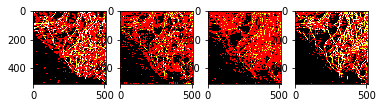

In [14]:
test_dataset_name =['base_super/sample_super/']
evaluate_val(test_dataset_name,epoch='train')


In [18]:
path='base_super/sample_super/train_1815_59.tif'
img = scipy.misc.imread(path).astype(np.float)


C:\Users\Tony\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [19]:
eval(img,path)

C:\Users\Tony\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


the eval of image :base_super/sample_super/train_1815_59.tif
the gt compare with w1 :
mse  : 853.2493909200033   ,  nrmse : 1.0988004713892527
psnr : 18.8200437393209   ,  ssim  : 0.7807094694596413
the gt compare with w2 :
mse  : 1214.6032702128093   ,  nrmse : 0.6923615167496318
psnr : 17.28645914779978   ,  ssim  : 0.7584636599259591
the gt compare with fusion :
mse  : 1267.7687924702961   ,  nrmse : 0.6843519278585619
psnr : 17.100403039389395   ,  ssim  : 0.6605168129310601
